### Superdense coding

in Qiskit

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_ibm_runtime import Sampler, QiskitRuntimeService
from qiskit_aer import Aer
import numpy as np
import random

%matplotlib inline

Alice sends:    01
Bob receives:   01


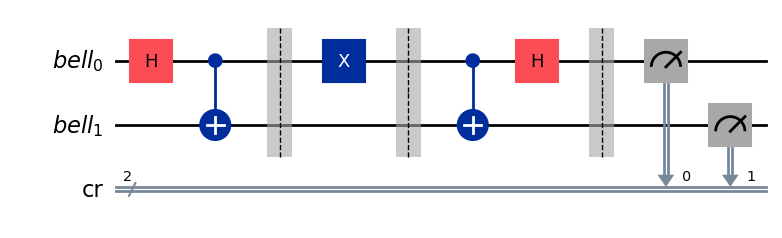

In [45]:
# Let's start by creating a Bell pair that Alice and Bob share

bell = QuantumRegister(2, "bell")
cr = ClassicalRegister(2, "cr")
qc = QuantumCircuit(bell, cr)

qc.h(bell[0])
qc.cx(bell[0], bell[1])
qc.barrier()


# We randomly choose bits to send
b1 = random.randint(0, 1)
b2 = random.randint(0, 1)

print(f"{"Alice sends:":<15} {b1}{b2}")


# Alice applies necessary gates:
if b2 == 1:
    qc.x(bell[0])
if b1 == 1:
    qc.z(bell[0])
qc.barrier()


# Bob decodes the bits
qc.cx(bell[0], bell[1])
qc.h([bell[0]])
qc.barrier()
qc.measure(bell, cr)

qc.draw("mpl")


# run the experiment
backend = Aer.get_backend("qasm_simulator")
job = backend.run(qc, shots=1, memory=True)
res = job.result().get_memory()
print(f"{"Bob receives:":<15} {int(res[0][1])}{int(res[0][0])}")